In [88]:
## importing the needed libraraies
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import power_transform
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [89]:
#fetching the data
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [90]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [91]:
#looking for null values
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

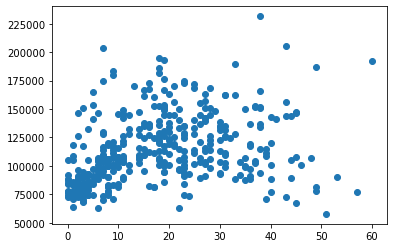

In [92]:
plt.scatter(data['yrs.service'],data['salary']);

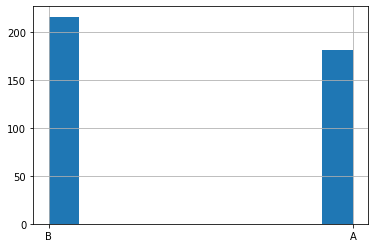

In [93]:
data['discipline'].hist();

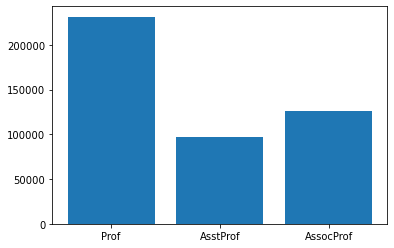

In [94]:
plt.bar(data['rank'],data['salary']);

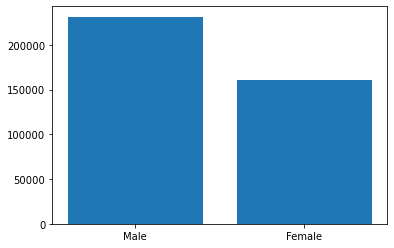

In [95]:
plt.bar(data['sex'],data['salary']);

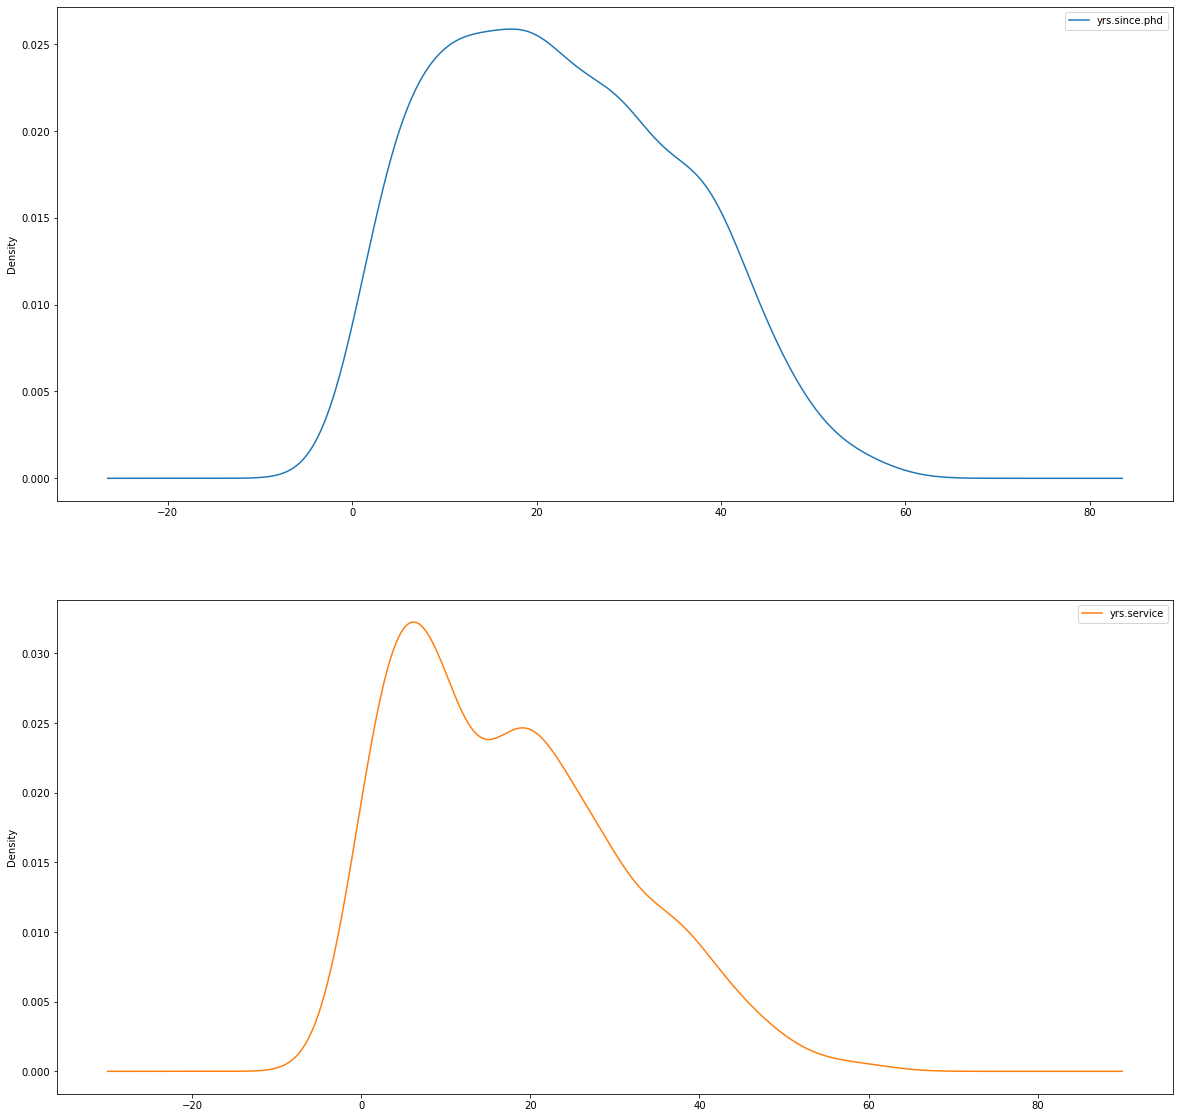

In [96]:
data.drop(['salary'],axis=1).plot( kind="kde",subplots=True,legend=True,figsize=(20,20),sharex=False);
plt.show()

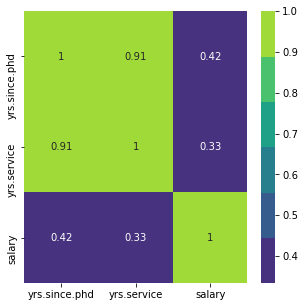

In [97]:
# heat map of cor-relation
plt.figure(figsize=(5,5))

colormap=sns.color_palette("viridis")

sns.heatmap(data.corr() ,cmap=colormap ,annot = True)
plt.show()

In [98]:
independent=data.drop('salary',axis=1)
target=data['salary']
independent.skew().sort_values(ascending=False)

yrs.service      0.650569
yrs.since.phd    0.300880
dtype: float64

In [99]:
x=power_transform(independent[['yrs.since.phd','yrs.service']])

In [100]:
pd.DataFrame(x).skew().sort_values(ascending=False)

1   -0.122152
0   -0.132757
dtype: float64

In [101]:
independent['Yrs.since.phd']=0
for i in range(len(independent['yrs.since.phd'])):
    independent['Yrs.since.phd'][i]=x[i][0]
    independent['yrs.service'][i]=x[i][1]

In [102]:
independent

,rank,discipline,yrs.since.phd,yrs.service,sex,Yrs.since.phd
0,Prof,B,19,0,Male,0
1,Prof,B,20,0,Male,0
2,AsstProf,B,4,-1,Male,-1
3,Prof,B,45,1,Male,1
4,Prof,B,40,1,Male,1
...,...,...,...,...,...,...
392,Prof,A,33,0,Male,0
393,Prof,A,31,0,Male,0
394,Prof,A,42,0,Male,1
395,Prof,A,25,0,Male,0


In [103]:
independent= pd.get_dummies(independent, columns = ['rank','discipline','sex'],drop_first=True)
independent

,yrs.since.phd,yrs.service,Yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,0,0,1,1,1
1,20,0,0,0,1,1,1
2,4,-1,-1,1,0,1,1
3,45,1,1,0,1,1,1
4,40,1,1,0,1,1,1
...,...,...,...,...,...,...,...
392,33,0,0,0,1,0,1
393,31,0,0,0,1,0,1
394,42,0,1,0,1,0,1
395,25,0,0,0,1,0,1


In [72]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=i)
    model=LinearRegression()
    model.fit(x_train,y_train)
    pred= model.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print("R-square",maxAcc,'Random state',i)

R-square 0.37576999645844655 Random state 0
R-square 0.434560894702573 Random state 7
R-square 0.4641665845624099 Random state 64
R-square 0.47148825192153154 Random state 122
R-square 0.4784766191893468 Random state 150


In [104]:
from sklearn import datasets, linear_model, metrics
x=independent.drop('yrs.since.phd',axis=1)
y=target
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=150)
  
#Have a glance at the shape of the train and test sets:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(317, 6)
(80, 6)
(317,)
(80,)


In [105]:
#  Train the algorithm

from sklearn.linear_model import LinearRegression

# Regression model
regressor = LinearRegression()
# Fitting the data to my model
#model = regression.fit(x_train, y_train)
regressor.fit(x_train, y_train)   
LinearRegression()

LinearRegression()

In [106]:
# prediction
LR_pred = regressor.predict(x_test)
LR_pred = pd.DataFrame(LR_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
LR_pred['Real Values'] = l

LR_pred['Difference'] = LR_pred['Predictions']-LR_pred['Real Values']

LR_pred

,Predictions,Real Values,Difference
0,124430.011352,105260,19170.011352
1,86352.890411,88825,-2472.109589
2,124153.043456,105000,19153.043456
3,116626.767741,136500,-19873.232259
4,135191.533086,133700,1491.533086
...,...,...,...
75,135684.218580,176500,-40815.781420
76,116626.767741,144050,-27423.232259
77,78272.678903,97032,-18759.321097
78,86341.276600,81285,5056.276600


In [107]:
regressor.score(x_test,y_test)

0.5510340835352592

In [24]:
regressor.score(x_test,y_test)

0.5163827676416987

In [131]:
## using dummies
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

data['sex']= label_encoder.fit_transform(data['sex'])
data['discipline']= label_encoder.fit_transform(data['discipline']) 
data['rank']= label_encoder.fit_transform(data['rank']) 
data

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data[['yrs.since.phd','yrs.service']])

for i in range(len(data_scaled)):
    data['yrs.since.phd'][i]=data_scaled[i][0]
    data['yrs.service'][i]=data_scaled[i][1]
#     data['salary'][i]=data_scaled[i][2]

# data=pd.get_dummies(data, columns = ['rank','discipline','sex'],drop_first=True)

In [137]:
# splitting X and y into training and testing sets
x=data.drop(['salary'],axis=1)
y=data.salary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=150)
# Regression model
regressor = LinearRegression()
# Fitting the data to my model
#model = regression.fit(x_train, y_train)
regressor.fit(x_train, y_train)   
LinearRegression()

LinearRegression()

In [138]:
# prediction
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
y_pred['Real Values'] = l

y_pred['Difference'] = y_pred['Predictions']-y_pred['Real Values']

y_pred

,Predictions,Real Values,Difference
0,114395.256170,105260,9135.256170
1,103836.795805,88825,15011.795805
2,109485.680130,105000,4485.680130
3,123027.452879,136500,-13472.547121
4,138432.639994,133700,4732.639994
...,...,...,...
75,130483.221475,176500,-46016.778525
76,123368.841974,144050,-20681.158026
77,107218.027379,97032,10186.027379
78,78025.409154,81285,-3259.590846


In [139]:
regressor.score(x_test,y_test)

0.4878750065818631

In [140]:
r2_score(y_test,y_pred['Predictions'])

0.4878750065818631

In [141]:
regressor.score(x_train,y_train)

0.32625240746801676

In [146]:
# Ridge Regression
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
data['sex']= label_encoder.fit_transform(data['sex'])
data['discipline']= label_encoder.fit_transform(data['discipline']) 
data['rank']= label_encoder.fit_transform(data['rank']) 


ridge = Ridge()

parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

x=data.drop(['salary'],axis=1)
y=data.salary

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=150)

ridge_regression.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [147]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 1}
-649192136.6237173


In [148]:
ridge_regression.score(x_test,y_test)

-383011854.10497236

In [149]:
ridge_regression.score(x_train,y_train)

-626852372.487234

In [158]:
# prediction
ridge_pred = ridge_regression.predict(x_test)
ridge_pred = pd.DataFrame(ridge_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
ridge_pred['Real Values'] = l

ridge_pred['Difference'] = ridge_pred['Predictions']-ridge_pred['Real Values']

ridge_pred

,Predictions,Real Values,Difference
0,113657.307856,105260,8397.307856
1,105755.267914,88825,16930.267914
2,109534.930411,105000,4534.930411
3,117499.092693,136500,-19000.907307
4,154825.003296,133700,21125.003296
...,...,...,...
75,133957.724215,176500,-42542.275785
76,121768.486592,144050,-22281.513408
77,103607.386218,97032,6575.386218
78,78438.859151,81285,-2846.140849


In [159]:
ridge_regression.score(x_test,y_test)

-383011854.10497236

In [160]:
ridge_regression.score(x_train,y_train)

-626852372.487234

In [161]:
lasso = Lasso()

x=data.drop(['salary'],axis=1)
y=data.salary

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=150)
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x, y)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 55}
-636070396.2204423


In [162]:
# prediction
lasso_pred = lasso_regression.predict(x_test)
lasso_pred = pd.DataFrame(lasso_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
lasso_pred['Real Values'] = l

lasso_pred['Difference'] = lasso_pred['Predictions']-lasso_pred['Real Values']

lasso_pred

,Predictions,Real Values,Difference
0,111909.870752,105260,6649.870752
1,103515.747459,88825,14690.747459
2,107326.350695,105000,2326.350695
3,120794.199109,136500,-15705.800891
4,150171.025389,133700,16471.025389
...,...,...,...
75,132240.742449,176500,-44259.257551
76,125361.784588,144050,-18688.215412
77,101749.912033,97032,4717.912033
78,80001.473432,81285,-1283.526568


In [163]:
lasso_regression.score(x_test,y_test)

-342684357.0227995

In [164]:
lasso_regression.score(x_train,y_train)

-631827749.0412682